In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#returns shortfall percentage 
def count_shortfalls(data):
    sf_count = 0
    for i in range(data.shape[0]):
        if data[i] > 10:
            sf_count = sf_count + 1
    sf_count = sf_count / data.shape[0]
    return sf_count

In [4]:
# plt.violinplot(a,showmeans=True)
# plt.ylim([0, 100])

NameError: name 'a' is not defined

In [12]:
original_data = (np.genfromtxt("backend_calls.csv", delimiter=","))
original_data_s = (np.genfromtxt("backend_calls.csv", delimiter=",", dtype = str))

In [13]:
original_data_s[0,6:]

array(['Time_Assigned', 'Time_Enroute', 'Time_ArrivedAtScene',
       'Time_Depart_Scene', 'Time_Arrive_Destination', 'Time_Available',
       'Time_Call_Cleared', 'Call_Disposition', 'Longitude_Of_Emergency',
       'Latitude_Of_Emergency', 'transport_time', 'grid_time',
       'Time_Arrived', 'timedelta', 'arrival_seconds',
       'interarrival_seconds', 'neighborhood', 'dow'], dtype='<U30')

In [35]:
ncalls = 1000;
travel_time = original_data[1:,-8];
travel_time = travel_time / 60;
grid_time = original_data[1:ncalls,-7];
grid_time = grid_time / 60;
stoch_vanilla = np.genfromtxt("time_adjust/Stochastic40calls1000stochastic40.csv", delimiter=" ");
stoch_210 = np.genfromtxt("time_adjust/Stochastic40calls1000stochastic40_210grid_regression.csv", delimiter=" ");
stoch_3200 = np.genfromtxt("time_adjust/Stochastic40calls1000_3200grid.csv", delimiter=" ");
stoch_3200_r = np.genfromtxt("time_adjust/Stochastic40calls1000_3200grid_regression.csv", delimiter=" ");


In [36]:
#0 minute travel time is impossible, so should we delete it?
travel_time 
zero_ind = np.where(travel_time >= 1)
np.mean(travel_time[zero_ind])
travel_time = travel_time[zero_ind]

(0.0, 50.0)

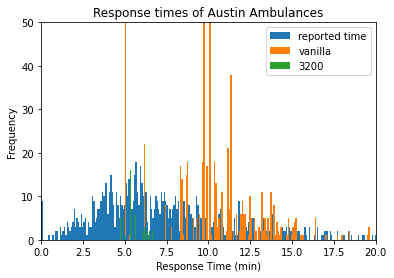

In [26]:
plt.hist(travel_time[1:1000], bins = 1000)
plt.hist(stoch_vanilla, bins = 1000)
plt.hist(stoch_3200, bins = 1000)
plt.legend(['reported time', 'vanilla', '3200'])
plt.xlabel("Response Time (min)")
plt.ylabel("Frequency")
plt.title("Response times of Austin Ambulances")
plt.xlim([0, 20])
plt.ylim([0,50])

In [40]:
print(np.mean(travel_time[1:1000]))
print(np.mean(stoch_vanilla))
print(np.mean(stoch_3200))
print(np.mean(stoch_3200_r))

8.165749082415749
9.813166666666666
8.145316666666666
5.689716666666667


(0.0, 20.0)

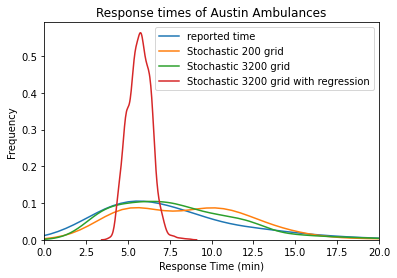

In [41]:
sns.kdeplot(travel_time[1:1000])
sns.kdeplot(stoch_vanilla)
sns.kdeplot(stoch_3200)
sns.kdeplot(stoch_3200_r)
plt.legend(['reported time', 'Stochastic 200 grid', 'Stochastic 3200 grid','Stochastic 3200 grid with regression'])
plt.xlabel("Response Time (min)")
plt.ylabel("Frequency")
plt.title("Response times of Austin Ambulances")
plt.xlim([0, 20])

In [ ]:
np.mean(stoch40) 

In [ ]:
np.mean(stoch50) * .92 
#travel time -8.147
#robust - 7.75
#stochastic - 8.34

In [ ]:
# Density plot
n, bins, patches = plt.hist(x=travel_time, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [ ]:
stoch40_c = np.genfromtxt("Stochastic40calls1000closest.csv", delimiter=" ");
stoch40_l = np.genfromtxt("Stochastic40calls1000lists.csv", delimiter=" ");
stoch40_u = np.genfromtxt("Stochastic40calls1000closest_xuniform.csv", delimiter=" ");

In [ ]:
print(count_shortfalls(stoch40_c))
print(count_shortfalls(stoch40_l))
print(count_shortfalls(stoch40_u))

In [ ]:
modifier = .92
sns.kdeplot(travel_time)
#sns.kdeplot(grid_time)
#sns.kdeplot(stoch40*modifier)
sns.kdeplot(stoch40_c*modifier)
#sns.kdeplot(robust40*modifier)
sns.kdeplot(stoch40_u*modifier)
plt.legend(['reported time', 'closest', 'lists'])
plt.xlabel("Response Time (min)")
plt.ylabel("Frequency")
plt.title("Response times of Austin Ambulances")
plt.xlim([0, 20])

In [ ]:
batch1 = np.genfromtxt("Robust0150calls1000batch1.csv", delimiter=" ");
batch2 = np.genfromtxt("Robust0150calls1000batch2.csv", delimiter=" ");
batch3 = np.genfromtxt("Robust0150calls1000batch3.csv", delimiter=" ");
batch4 = np.genfromtxt("Robust0150calls1000batch4.csv", delimiter=" ");
batch5 = np.genfromtxt("Robust0150calls1000batch5.csv", delimiter=" ");
batch6 = np.genfromtxt("Robust0150calls1000batch6.csv", delimiter=" ");
batch7 = np.genfromtxt("Robust0150calls1000batch7.csv", delimiter=" ");
batch8 = np.genfromtxt("Robust0150calls1000batch8.csv", delimiter=" ");
batch9 = np.genfromtxt("Robust0150calls1000batch9.csv", delimiter=" ");
batch10 = np.genfromtxt("Robust0150calls1000batch10.csv", delimiter=" ");
batch11 = np.genfromtxt("Robust0150calls1000batch11.csv", delimiter=" ");
batch12 = np.genfromtxt("Robust0150calls1000batch12.csv", delimiter=" ");


In [5]:
sns.kdeplot(batch1)
sns.kdeplot(batch2)
sns.kdeplot(batch3)
sns.kdeplot(batch4)
sns.kdeplot(batch5)
sns.kdeplot(batch6)
sns.kdeplot(batch7)
sns.kdeplot(batch8)
sns.kdeplot(batch9)
sns.kdeplot(batch10)
sns.kdeplot(batch11)
sns.kdeplot(batch12)
plt.xlim([0, 30])

NameError: name 'batch1' is not defined